# Import necessary elements

In [159]:
from scipy.special import binom
import matplotlib.pyplot as plt
from math import log,exp
import networkx as nx
import numpy as np
import copy as cp
import random

In [160]:
graph = nx.read_edgelist('/Users/lazraq/Desktop/NGSA/DM1/CA-GrQc.txt')

# Question 7

## 1. Basic properties of the network

Here is the results for the basic statistics 

In [161]:
print "number of nodes : " , len(graph.nodes)
print "number of edges : ", len(graph.edges)
print "number of connected components : ", nx.number_connected_components(graph)

number of nodes :  5242
number of edges :  14496
number of connected components :  355


In [162]:
liste_prep= nx.connected_components(graph)
liste_extract=[len(element) for element in liste_prep] 

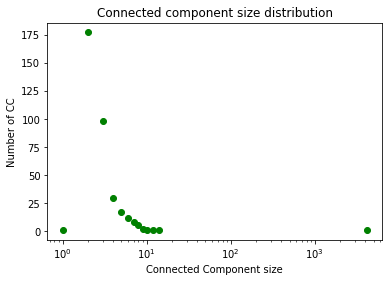

In [163]:
#let define a function that returns a dictionnary made of tulpe (element, # of occurence)
def count_element(liste):
    dictio = {}
    for element in liste:
        if element in dictio:
            dictio[element] += 1
        else:
            dictio[element] = 1
    return dictio

frequence= count_element(liste_extract)

plt.figure()
plt.plot(frequence.keys(), frequence.values(), 'go')
plt.xlabel("Connected Component size")
plt.ylabel("Number of CC")
plt.xscale("log")
plt.title("Connected component size distribution")
plt.show()

In [164]:
graph.number_of_nodes()

5242

In [165]:
GCC= max(nx.connected_component_subgraphs(graph), key=len)

Here is the statisitcs regarding the GCC : 

In [166]:
print "largest connected component nodes number : " , GCC.number_of_nodes()
print "largest connected component edges number : " , GCC.number_of_edges()
print "fraction of nodes of the whole graph that belong to GCC : " , GCC.number_of_nodes()/float(graph.number_of_nodes())*100," %"
print "fraction of edges of the whole graph that belong to GCC : " , GCC.number_of_edges()/float(graph.number_of_edges())*100," %"

largest connected component nodes number :  4158
largest connected component edges number :  13428
fraction of nodes of the whole graph that belong to GCC :  79.320869897  %
fraction of edges of the whole graph that belong to GCC :  92.6324503311  %


The network contain more than 300 connected component, but almost 80% of nodes are located on the GCC. This result could be found on social media. Isolated connected component could corresppond to isolated scientist with few co-authoring 

## 2. Analysis of the degree distribution

Here is the statisitcs regarding the degree distribution  : 

In [167]:
from statistics import mean, median
min_G=min(dict(graph.degree).values())
max_G =max(dict(graph.degree).values())
mean_G= mean(dict(graph.degree).values())
median_G=median(dict(graph.degree).values())

print "The minimum degree of the nodes of the graph : ", min_G
print "The maximun degree of the nodes of the graph : ", max_G
print "The mean degree of the nodes of the graph : ", mean_G
print "The median degree of the nodes of the graph : ", median_G


The minimum degree of the nodes of the graph :  1
The maximun degree of the nodes of the graph :  81
The mean degree of the nodes of the graph :  5.53071346814
The median degree of the nodes of the graph :  3.0


On average an autor has co-written with 6 other autors and the median express that 50% of autors had 3 or less co-autors which was expected. 

In [168]:
distrib_degree=count_element(dict(graph.degree).values())
print (distrib_degree)

{1: 1196, 2: 1114, 3: 775, 4: 497, 5: 299, 6: 225, 7: 159, 8: 141, 9: 98, 10: 92, 11: 66, 12: 46, 13: 58, 14: 38, 15: 48, 16: 25, 17: 43, 18: 20, 19: 19, 20: 28, 21: 16, 22: 12, 23: 44, 24: 8, 25: 8, 26: 7, 27: 3, 28: 5, 29: 3, 30: 8, 31: 9, 32: 3, 33: 9, 34: 37, 35: 1, 36: 2, 37: 5, 38: 1, 40: 1, 41: 3, 42: 19, 43: 2, 44: 1, 45: 13, 46: 2, 47: 4, 48: 3, 49: 4, 51: 2, 53: 1, 54: 1, 55: 1, 56: 3, 57: 1, 59: 1, 60: 1, 62: 1, 63: 1, 65: 1, 66: 1, 67: 1, 68: 2, 77: 2, 79: 1, 81: 1}


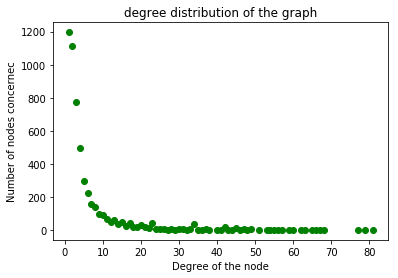

In [169]:
plt.figure()
plt.plot(distrib_degree.keys(), distrib_degree.values(), 'go')
plt.xlabel("Degree of the node")
plt.ylabel("Number of nodes concernec")
plt.title("degree distribution of the graph")
plt.show()

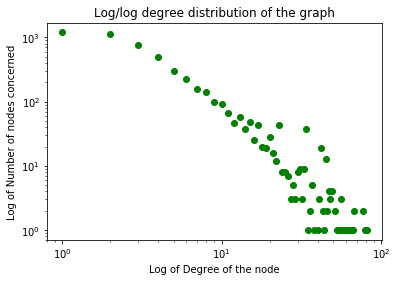

In [170]:
plt.figure()
plt.plot(distrib_degree.keys(), distrib_degree.values(), 'go')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log of Degree of the node")
plt.ylabel("Log of Number of nodes concerned")
plt.title("Log/log degree distribution of the graph")
plt.show()

In [171]:
def regression_degree (dictio):
    degree=dictio.keys()
    nbr=dictio.values()
    log_degree=np.log(degree)
    log_nbr=np.log(nbr)
    reg=np.polyfit(log_degree,log_nbr,1)
    log_a = reg[1]
    betta = -reg[0]
    regress = lambda k: exp(log_a)*k**-betta
    a=exp(log_a)
    return regress,a,betta



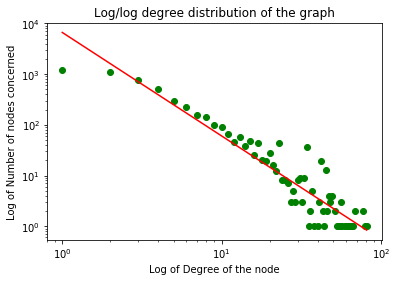

In [172]:
function, a,betta=regression_degree(distrib_degree)

plt.figure()
plt.plot(distrib_degree.keys(), distrib_degree.values(), 'go')
plt.plot(distrib_degree.keys(),function(distrib_degree.keys()),'r')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log of Degree of the node")
plt.ylabel("Log of Number of nodes concerned")
plt.title("Log/log degree distribution of the graph")
plt.show()

The distribution is a power-law distribution as shown by the log-log graph and we can suppose that the number $N_{k}$ of node having a degree $k$ could be approximated by : $N_{k}=ak^{\alpha}$  whith a and alpha beiing : 

In [173]:
print " a = ", a, " and alpha = ", betta 

 a =  6610.35572874  and alpha =  2.041777733897052


## 3. Triangles

In [174]:
print "total number of triangles in the GCC of the network : ", sum(nx.triangles(GCC).values())/3

total number of triangles in the GCC of the network :  47779


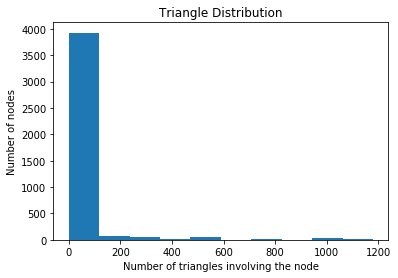

In [175]:
plt.hist(nx.triangles(GCC).values())
plt.xlabel('Number of triangles involving the node')
plt.ylabel('Number of nodes')
plt.title('Triangle Distribution')
plt.show()

This representation shows that the majority of nodes are involved in less than 100 triangles 

## 4. Spectral counting of triangles

In [176]:
Adgency_GCC = nx.to_numpy_matrix(GCC)

In [177]:
from numpy import linalg as LA
eigenvalues = LA.eigvals(Adgency_GCC)

In [178]:
def number_triangle (eigenvalues):
    total_nbr = 0
    liste_value = []
    number_triangle_ii = [float(eigen**3) / 6 for eigen in eigvalues]
    for eigen in number_triangle_ii:
        total_nbr += eigen
        liste_value.append(total_nbr)
    return liste_value
    

In [179]:
liste_value=number_triangle (eigenvalues)
liste_value

/Users/lazraq/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


[15820.465662098663,
 25054.140290111463,
 31608.945809330995,
 33637.80135039348,
 35533.025586870695,
 36926.554482427346,
 37863.93072800899,
 38637.94597830183,
 39200.94604897213,
 39747.03375394061,
 40212.41936526725,
 40610.446504643245,
 40952.54069232271,
 41254.32420108388,
 41543.042653945704,
 41779.352260924075,
 42001.04710590101,
 42173.51781717013,
 42332.35217250345,
 42482.810396847985,
 42625.4618665171,
 42764.6307462,
 42897.50043687729,
 43027.269303022294,
 43155.299100674616,
 43274.699413873735,
 43390.75175782975,
 43503.4269911749,
 43613.71527187885,
 43719.148873745544,
 43820.177089991834,
 43919.197862127105,
 44013.40096948501,
 44106.35289365231,
 44195.80718261133,
 44283.73763967815,
 44371.0762109189,
 44456.55580384879,
 44538.269274975755,
 44616.40746423314,
 44692.55430421704,
 44627.51355470805,
 44563.396452969864,
 44637.72663208105,
 44711.04189768625,
 44783.53870485002,
 44852.855865474805,
 44921.016528233886,
 44988.38450074269,
 45054.8

/Users/lazraq/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


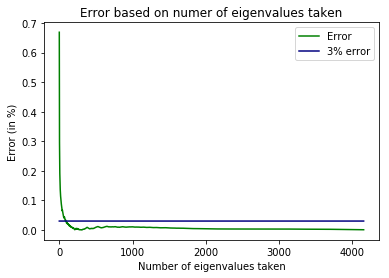

In [181]:
liste_value=number_triangle (eigenvalues)
error = [float(abs(value - 47779)) / 47779 for value in liste_value]
plt.plot(error, label = 'Error', color = 'green')
plt.plot([0.03 for i in range(len(liste_value))], color = 'navy', label = '3% error')
#plt.xlim(0,1000)
plt.legend()
plt.title('Error based on numer of eigenvalues taken')
plt.xlabel('Number of eigenvalues taken')
plt.ylabel('Error (in %)')
plt.show()

# Question 8

## a)

In [182]:
graph_random = nx.fast_gnp_random_graph(n=1000, p=0.009)

In [183]:
print "Experiemental mean degree of the graph : " , mean(dict(graph_random.degree).values())

Experiemental mean degree of the graph :  9.142


## b)

In [185]:
print "Random graph is connected: ", nx.is_connected(graph_random)

Random graph is connected:  True


## c)

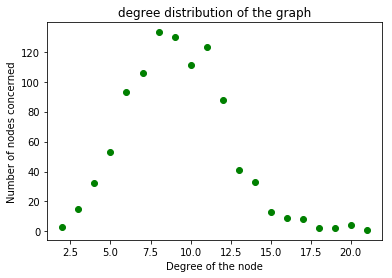

In [186]:
distrib_degree=count_element(dict(graph_random.degree).values())
plt.figure()
plt.plot(distrib_degree.keys(), distrib_degree.values(), 'go')
plt.xlabel("Degree of the node")
plt.ylabel("Number of nodes concerned")
plt.title("degree distribution of the graph")
plt.show()

# Question 9

## a)

In [187]:
A1 = np.array([[0.99,0.26], [0.26,0.53]])
n=int(log(graph.number_of_nodes())/log(2))

In [188]:
def produit(A,k):
    A_r=A
    for i in range (k):
        A_r = np.kron(A_r, A)
    return A_r

def trans(A):
    rows = A.shape[0]
    col = A.shape[1]
    result = np.zeros((rows, col))
    for i in range (rows):
        for j in range (col):
            p=A[i][j]
            result[i][j]=np.random.binomial(1,p)
    return result 

In [189]:
A_n= produit(A1,n)

In [ ]:
graph_A_n=nx.from_numpy_matrix(trans(A_n))

In [131]:
len(graph_A_n.nodes)

8192

In [141]:
print "The produced Kronecker graph is connected ? ",nx.is_connected(graph_A_n)
GCC_kron=max(nx.connected_component_subgraphs(graph_A_n), key=len)
print "Giant connected component size = ", len(GCC.nodes), " for n equal to : ", graph_A_n.number_of_nodes()

The produced Kronecker graph is connected ?  False
Giant connected component size =  5979  for n equal to :  8192


## b)

### Connected component size distribution of the Kronecker graph

In [ ]:
liste_prep= nx.connected_components(graph_A_n)
liste_extract=[len(element) for element in liste_prep] 

frequence= count_element(liste_extract)

plt.figure()
plt.plot(frequence.keys(), frequence.values(), 'go')
plt.xlabel("Connected Component size")
plt.ylabel("Number of CC")
plt.xscale("log")
plt.title("Connected component size distribution")
plt.show()

### Proportion of the GCC nodes and edges on the global graph

In [ ]:
print "largest connected component nodes number : " , GCC_kron.number_of_nodes()
print "largest connected component edges number : " , GCC_kron.number_of_edges()
print "fraction of nodes of the whole graph that belong to GCC : " , GCC_kron.number_of_nodes()/float(graph_A_n.number_of_nodes())*100," %"
print "fraction of edges of the whole graph that belong to GCC : " , GCC_kron.number_of_edges()/float(graph_A_n.number_of_edges())*100," %"

### Degree distribution

In [145]:
distrib_degree_kron=count_element(dict(graph_A_n.degree).values())

In [147]:
print(distrib_degree_kron)

{0: 1809, 1: 1835, 2: 1407, 3: 1043, 4: 639, 5: 442, 6: 300, 7: 188, 8: 147, 9: 101, 10: 64, 11: 55, 12: 41, 13: 40, 14: 13, 15: 14, 16: 13, 17: 16, 18: 3, 19: 4, 20: 3, 22: 3, 23: 3, 24: 2, 25: 1, 29: 2, 31: 1, 33: 1, 34: 2}


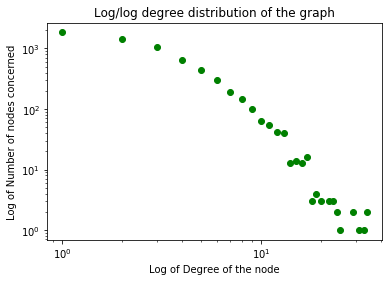

In [148]:
plt.figure()
plt.plot(distrib_degree_kron.keys(), distrib_degree_kron.values(), 'go')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log of Degree of the node")
plt.ylabel("Log of Number of nodes concerned")
plt.title("Log/log degree distribution of the graph")
plt.show()

# Question 10

In [149]:
def random_remove (prop, graph): 
    copy_graph= cp.deepcopy(graph)
    number_remove = int(prop*copy_graph.number_of_nodes())
    list_to_remove= random.sample(copy_graph.nodes(), number_remove)
    copy_graph.remove_nodes_from(list_to_remove)
    GCC= max(nx.connected_component_subgraphs(copy_graph), key=len)
    return [GCC.number_of_nodes(),copy_graph.number_of_nodes()-GCC.number_of_nodes()]

def target_remove (prop, graph): 
    copy_graph= cp.deepcopy(graph)
    list_node_sorted=sorted(dict(copy_graph.degree()).items(),key=operator.itemgetter(1), reverse=True)
    for i in range(int(copy_graph.number_of_nodes()*prop)):
        copy_graph.remove_node(list_node_sorted[i][0])
    GCC= max(nx.connected_component_subgraphs(copy_graph), key=len)
    return [GCC.number_of_nodes(),copy_graph.number_of_nodes()-GCC.number_of_nodes()]
    

In [155]:
prop_vect = np.linspace(0, 0.2, 100)

def remove_plot (prop_vect, graph): 
    GCC_random=[]
    GCC_target=[]
    other_random=[]
    other_target=[]
    for i in range (len(prop_vect)):
        temp_1=random_remove (prop_vect[i], graph)
        temp_2=target_remove (prop_vect[i], graph)
        GCC_random.append(temp_1[0])
        other_random.append(temp_1[1])
        GCC_target.append(temp_2[0])
        other_target.append(temp_2[1])
    return GCC_random,GCC_target,other_random,other_target


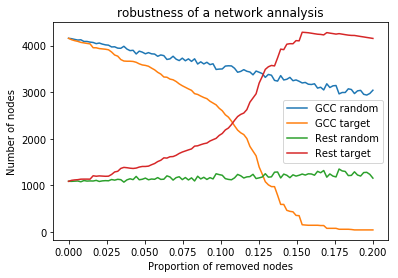

In [156]:
GCC_random,GCC_target,other_random,other_target=remove_plot (prop_vect, graph)

plt.figure()
plt.plot(prop_vect, GCC_random)
plt.plot(prop_vect, GCC_target)
plt.plot(prop_vect, other_random)
plt.plot(prop_vect, other_target)
plt.legend(["GCC random","GCC target", "Rest random", "Rest target"])
plt.xlabel("Proportion of removed nodes")
plt.ylabel("Number of nodes")
plt.title("robustness of a network annalysis")
plt.show()